Importing libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('C:\\Users\\shadow\\OneDrive\\Desktop\\ibm project\\Development Phase\\Project\\Data\\Admission_Predict (1).csv')

In [5]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.describe

<bound method NDFrame.describe of      Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0             1        337          118                  4  4.5   4.5  9.65   
1             2        324          107                  4  4.0   4.5  8.87   
2             3        316          104                  3  3.0   3.5  8.00   
3             4        322          110                  3  3.5   2.5  8.67   
4             5        314          103                  2  2.0   3.0  8.21   
..          ...        ...          ...                ...  ...   ...   ...   
395         396        324          110                  3  3.5   3.5  9.04   
396         397        325          107                  3  3.0   3.5  9.11   
397         398        330          116                  4  5.0   4.5  9.45   
398         399        312          103                  3  3.5   4.0  8.78   
399         400        333          117                  4  5.0   4.0  9.66   

     Research  Ch

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


**Handling Missing Values**

In [8]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Data Visualization**

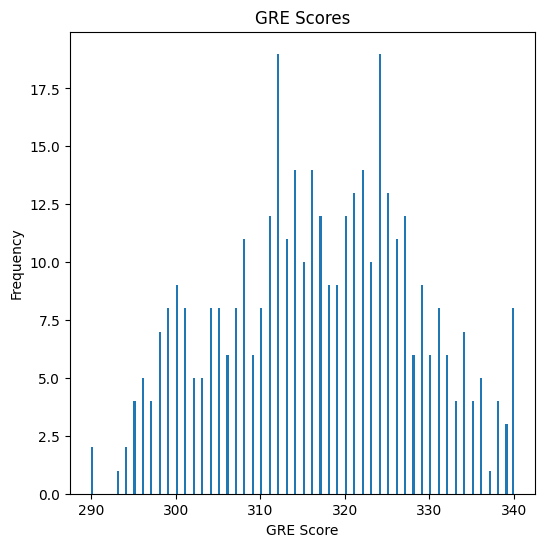

In [9]:
data["GRE Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))

plt.title("GRE Scores")
plt.xlabel("GRE Score")
plt.ylabel("Frequency")

plt.show()

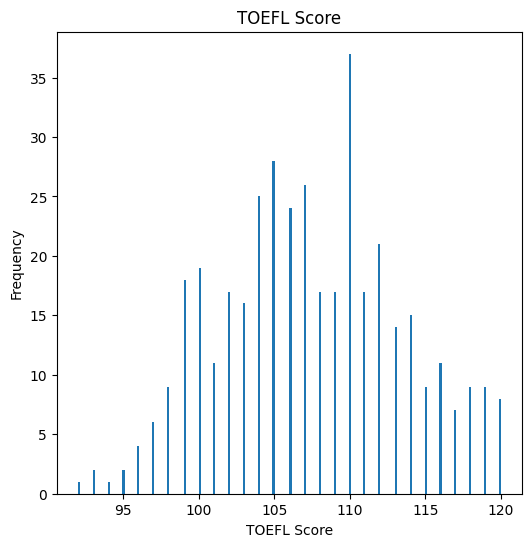

In [10]:
data["TOEFL Score"].plot(kind = 'hist',bins = 200,figsize = (6,6))

plt.title("TOEFL Score")
plt.xlabel("TOEFL Score")
plt.ylabel("Frequency")

plt.show()

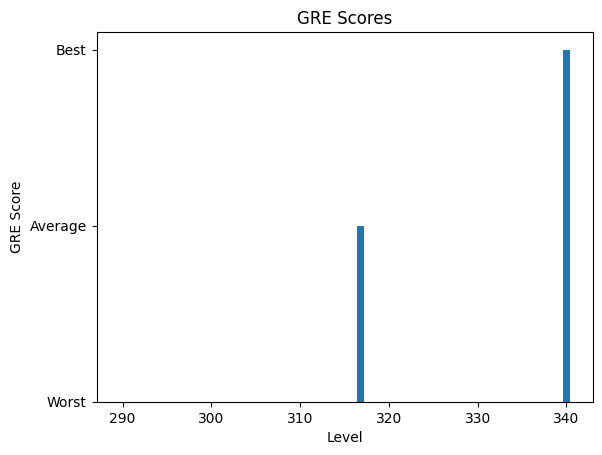

In [11]:
g = np.array([data["GRE Score"].min(),data["GRE Score"].mean(),data["GRE Score"].max()])
h = ["Worst","Average","Best"]
plt.bar(g,h)

plt.title("GRE Scores")
plt.xlabel("Level")
plt.ylabel("GRE Score")

plt.show()

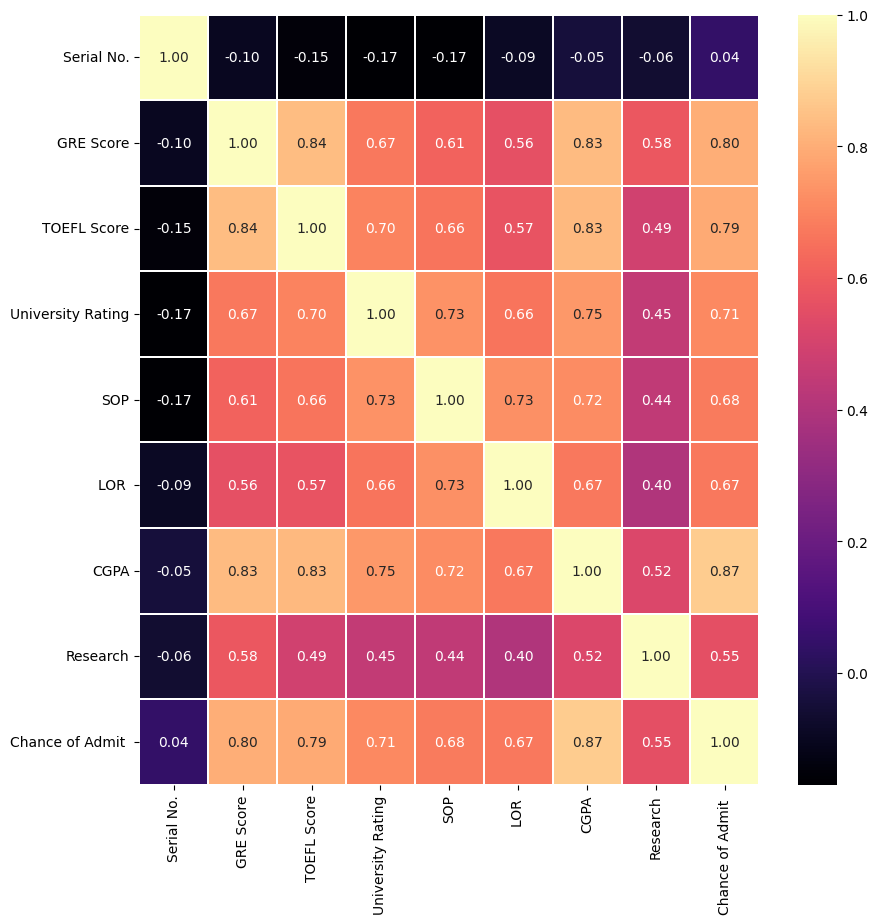

In [12]:
plt.figure(figsize=(10, 10))

sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")

plt.show()

<AxesSubplot: xlabel='University Rating', ylabel='count'>

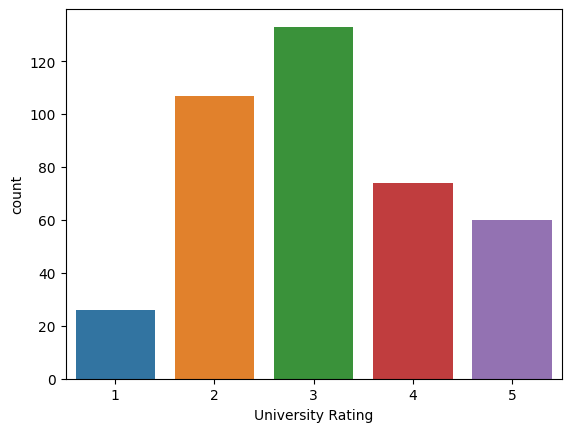

In [13]:
data.Research.value_counts()

sns.countplot(x="University Rating",data=data)

**Training and Testing Split**

In [14]:
X=data.drop(['Chance of Admit '],axis=1) 
y=data['Chance of Admit '] 

In [15]:
X

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1
396,397,325,107,3,3.0,3.5,9.11,1
397,398,330,116,4,5.0,4.5,9.45,1
398,399,312,103,3,3.5,4.0,8.78,0


In [31]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
395    0.82
396    0.84
397    0.91
398    0.67
399    0.95
Name: Chance of Admit , Length: 400, dtype: float64

In [16]:
from sklearn.model_selection import train_test_split 
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.15)

In [17]:
X_Train.shape

(340, 8)

In [18]:
y_Train.shape

(340,)

In [19]:
y_Test.shape

(60,)

In [20]:
X_Test.shape

(60, 8)

**MODELING AND TRAINING**

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
rgr = GradientBoostingRegressor()
rgr.fit(X_Train,y_Train)

GradientBoostingRegressor()

In [40]:
rgr.score(X_Test,y_Test)

0.8924247349697868

In [23]:
y_predict=rgr.predict(X_Test)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
import numpy as np
print('Mean Absolute Error:', mean_absolute_error(y_Test, y_predict))  
print('Mean Squared Error:', mean_squared_error(y_Test, y_predict))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_Test, y_predict)))

Mean Absolute Error: 0.036856448408973445
Mean Squared Error: 0.002192668178355762
Root Mean Squared Error: 0.04682593489035496


In [54]:
y_Train = (y_Train>0.5)
y_Test = (y_Test>0.5)



350    True
185    True
69     True
246    True
129    True
       ... 
273    True
370    True
121    True
226    True
380    True
Name: Chance of Admit , Length: 340, dtype: bool

In [46]:
from sklearn.linear_model._logistic import LogisticRegression

lore = LogisticRegression(random_state=0, max_iter=1000)

lr = lore.fit(X_Train, y_Train)

In [27]:
y_pred = lr.predict(X_Test)

In [49]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print('Accuracy Score:', accuracy_score(y_Test, y_pred))  
print('Recall Score:', recall_score(y_Test, y_pred))  
print('ROC AUC Score:', roc_auc_score(y_Test, y_pred))
print('Confussion Matrix:\n', confusion_matrix(y_Test, y_pred))

Accuracy Score: 0.9333333333333333
Recall Score: 0.9259259259259259
ROC AUC Score: 0.962962962962963
Confussion Matrix:
 [[ 6  0]
 [ 4 50]]


In [29]:
import joblib
joblib.dump(rgr,'model.pkl')

['model.pkl']